## Initial Test

In [1]:
import sys
sys.path.append("../")
import os

current_directory = os.getcwd()
print(current_directory)
from egta.symmetric_game import *
from egta.game import *
from egta.utils.eq_computation import *
from egta.utils.log_multimodal import *
from egta.utils.random_functions import *
from egta.utils.simplex_operations import *
from egta.process_data import *
import matplotlib.pyplot as plt

#test data
#1 for 1 win, 0 for tie, -1 for loss
# 1 -> 2 -> 3 -> 1
rps_data = [ #nash equilibrium is [1/3, 1/3, 1/3] for this data, it is the check data
    [
        ['agent_1', 'ROCK', 0],      
        ['agent_2', 'PAPER', 0],     
        ['agent_3', 'SCISSORS', 0]   
    ],
    
    [
        ['agent_1', 'ROCK', -1],      
        ['agent_2', 'ROCK', -1],      
        ['agent_3', 'PAPER', 2]      
    ],
    
    [
        ['agent_1', 'ROCK', 1],      
        ['agent_2', 'ROCK', 1],      
        ['agent_3', 'SCISSORS', -2] 
    ],
    
    [
        ['agent_1', 'ROCK', -2],     
        ['agent_2', 'PAPER', 1],    
        ['agent_3', 'PAPER', 1]      
    ],
    
    [
        ['agent_1', 'PAPER', -1],    
        ['agent_2', 'PAPER', -1],    
        ['agent_3', 'SCISSORS', 2]   
    ],
    
    [
        ['agent_1', 'ROCK', 2],      
        ['agent_2', 'SCISSORS', -1], 
        ['agent_3', 'SCISSORS', -1]  
    ],
    
    [
        ['agent_1', 'PAPER', -2],    
        ['agent_2', 'SCISSORS', 1], 
        ['agent_3', 'SCISSORS', 1]   
    ],
    
    [
        ['agent_1', 'ROCK', 0],     
        ['agent_2', 'ROCK', 0],
        ['agent_3', 'ROCK', 0]
    ],
    
    [
        ['agent_1', 'PAPER', 0],    
        ['agent_2', 'PAPER', 0],
        ['agent_3', 'PAPER', 0]
    ],
    
    [
        ['agent_1', 'SCISSORS', 0], 
        ['agent_2', 'SCISSORS', 0],
        ['agent_3', 'SCISSORS', 0]
    ]
]



/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta


Matplotlib created a temporary cache directory at /var/folders/fh/fwc37qhn04d8sxp65hwv1kxm0000gn/T/matplotlib-4ude0qtv because the default path (/Users/gabesmithline/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


3
3
['PAPER', 'ROCK', 'SCISSORS']
tensor([[1., 1., 1.],
        [1., 2., 0.],
        [0., 2., 1.],
        [2., 1., 0.],
        [2., 0., 1.],
        [0., 1., 2.],
        [1., 0., 2.],
        [0., 3., 0.],
        [3., 0., 0.],
        [0., 0., 3.]])
tensor([[-11.5129,   0.0000, -11.5129, -11.5116, -11.5129, -11.5129, -11.5129,
         -11.5129, -11.5129, -11.5129],
        [-11.5129, -11.5129, -11.5116, -11.5129, -11.5129,   0.0000, -11.5129,
         -11.5129, -11.5129, -11.5129],
        [-11.5129, -11.5129, -11.5129, -11.5129,   0.0000, -11.5129, -11.5116,
         -11.5129, -11.5129, -11.5129]])
| Profile    |   PAPER Count |   ROCK Count |   SCISSORS Count | PAPER Payoff   | ROCK Payoff   | SCISSORS Payoff   |
|:-----------|--------------:|-------------:|-----------------:|:---------------|:--------------|:------------------|
| Profile 1  |             1 |            1 |                1 | 1.0000         | 1.0000        | 1.0000            |
| Profile 2  |             1 |   

/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta/../egta/symmetric_game.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.config_table = torch.tensor(config_table, dtype=torch.float32, device=device)
/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta/../egta/symmetric_game.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.payoff_table = torch.tensor(payoff_table, dtype=torch.float32, device=device)


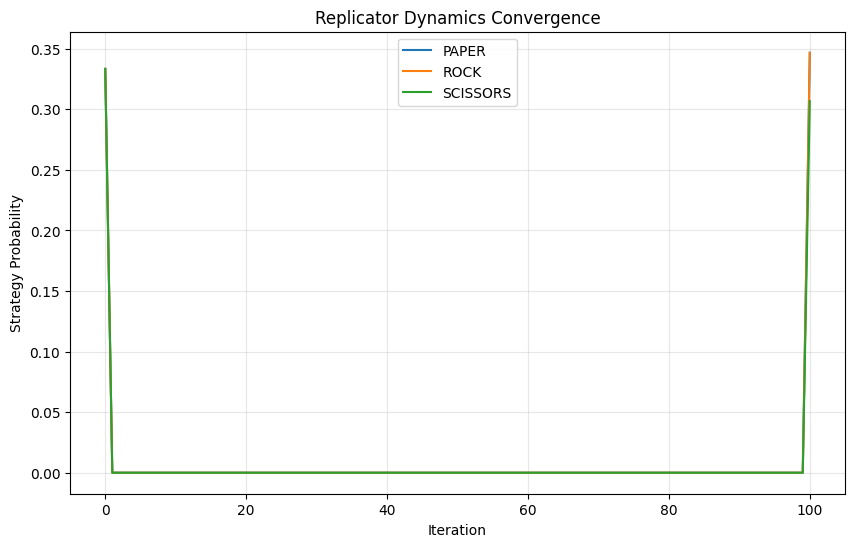

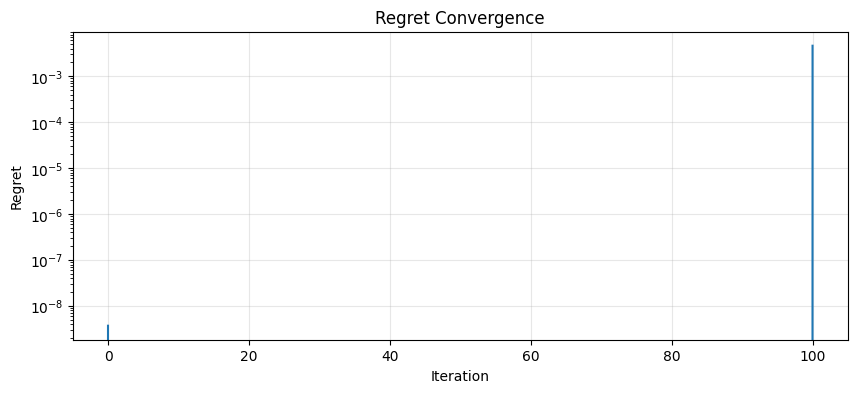

In [6]:
# Create symmetric game from the data
device = "cuda" if torch.cuda.is_available() else "cpu"
rps_game = create_symmetric_game_from_data(rps_data, device=device)
print(rps_game.num_players)
print(rps_game.num_actions)
print(rps_game.strategy_names)
print(rps_game.config_table)
print(rps_game.payoff_table)
print(rps_game.print_full_heuristic_payoff_table())
print(f"Created RPS game with {rps_game.num_players} players and {rps_game.num_actions} strategies")
print(f"Strategy names: {rps_game.strategy_names}")

# Find Nash equilibrium using replicator dynamics
iters = 100
#
eq_mixture, eq_history = logged_fictitious_play(rps_game, [.3, .3, .4], iters=iters)

print("\nNash Equilibrium:")
for i, strat in enumerate(rps_game.strategy_names):
    print(f"{strat}: {eq_mixture[i].item():.4f}")

# Verify this matches the expected [1/3, 1/3, 1/3] distribution
print(f"\nMaximum deviation from uniform: {torch.max(torch.abs(eq_mixture - 1/3)).item():.6f}")

# Calculate regret at the equilibrium
regret = rps_game.regret(eq_mixture)
print(f"Regret at equilibrium: {regret.item():.6f}")

# Plot convergence history
plt.figure(figsize=(10, 6))
for i, strat in enumerate(rps_game.strategy_names):
    plt.plot(eq_history[i, :].cpu().numpy(), label=strat)
plt.xlabel("Iteration")
plt.ylabel("Strategy Probability")
plt.legend()
plt.title("Replicator Dynamics Convergence")
plt.grid(True, alpha=0.3)
plt.show()

# Plot regret over iterations
regrets = torch.zeros(iters+1, device=device)
for i in range(iters+1):
    regrets[i] = rps_game.regret(eq_history[:, i])

plt.figure(figsize=(10, 4))
plt.plot(regrets.cpu().numpy())
plt.xlabel("Iteration")
plt.ylabel("Regret")
plt.title("Regret Convergence")
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()